In [4]:
#import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import data

path_data='/content/DataSet/Electric_Vehicle_Population_Data.csv'
ev_data= pd.read_csv(path_data)

#visualizar dataframe
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186879 entries, 0 to 186878
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         186879 non-null  object 
 1   County                                             186876 non-null  object 
 2   City                                               186876 non-null  object 
 3   State                                              186879 non-null  object 
 4   Postal Code                                        186876 non-null  float64
 5   Model Year                                         186879 non-null  int64  
 6   Make                                               186879 non-null  object 
 7   Model                                              186879 non-null  object 
 8   Electric Vehicle Type                              186879 non-null  object

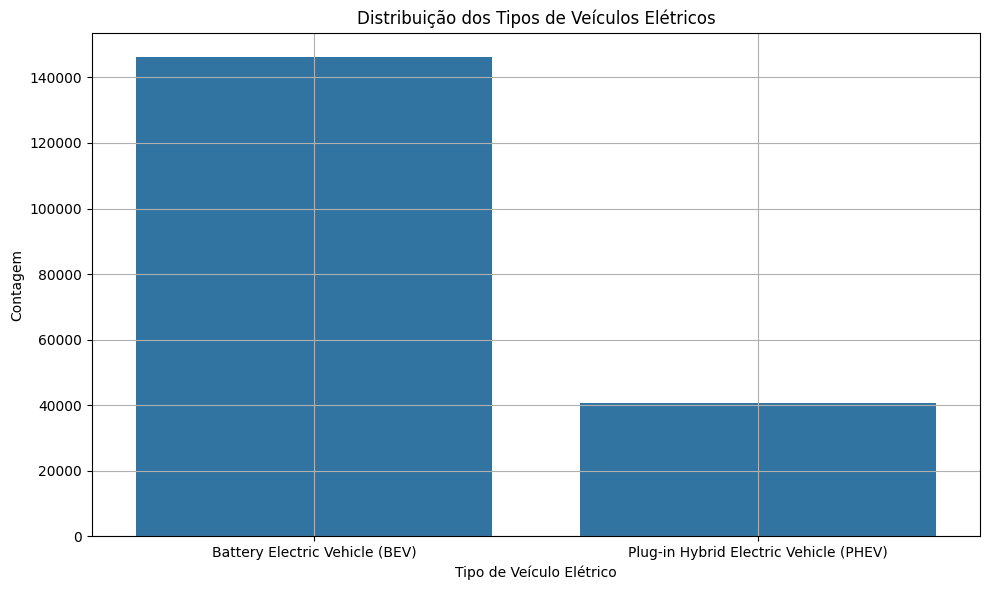

In [18]:
#info do dataset

ev_data.info()

ev_data.describe()
ev_data.isnull().sum()

#tipos de veiculos eletricos
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=ev_data)
plt.title('Distribuição dos Tipos de Veículos Elétricos')
plt.xlabel('Tipo de Veículo Elétrico')
plt.ylabel('Contagem')
plt.grid(True)
plt.tight_layout()
plt.show()



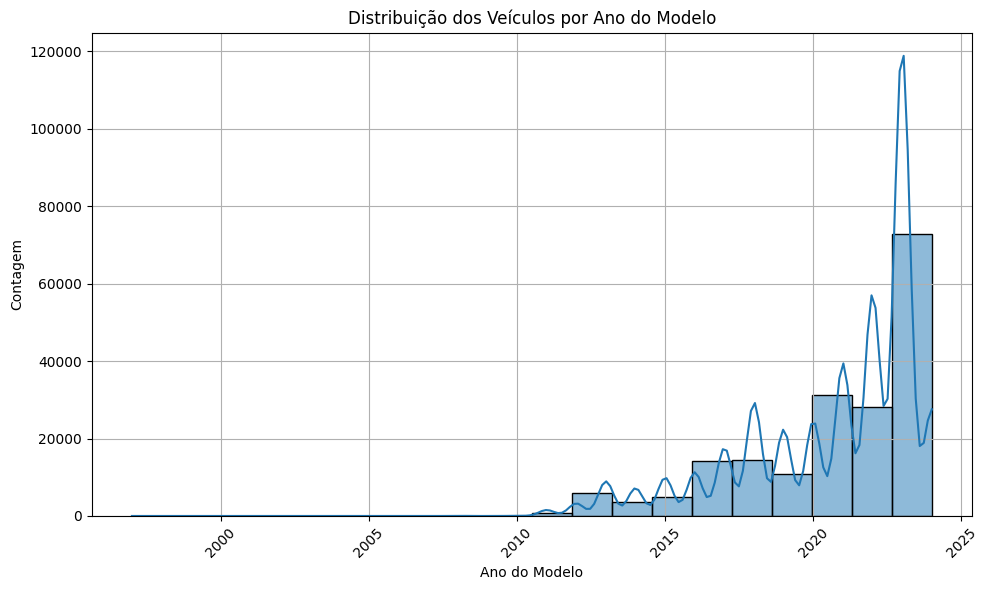

In [17]:
# veiculos por ano do modelo
plt.figure(figsize=(10, 6))
sns.histplot(ev_data['Model Year'], bins=20, kde=True)
plt.title('Distribuição dos Veículos por Ano do Modelo')
plt.xlabel('Ano do Modelo')
plt.ylabel('Contagem')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#previsao de alcance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

 #Variaveis independentes e dependentes
X = ev_data[['Model Year', 'Base MSRP']]
y = ev_data['Electric Range']

#dados em treinoe teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

#previsao
y_pred = model.predict(X_test)

#Avaliaçao do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6343.689116974665


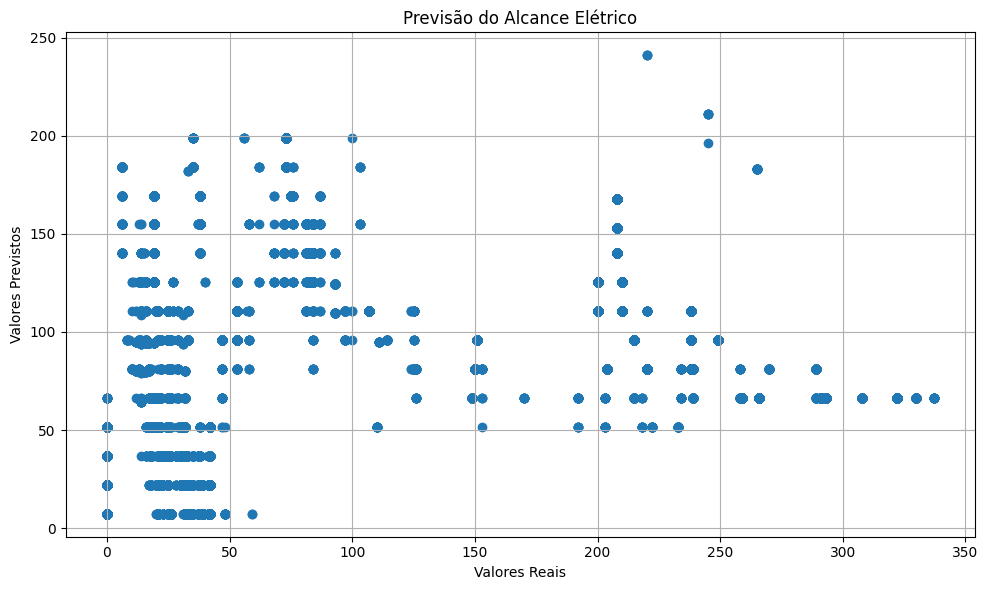

In [20]:
#resultado de previsao
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsão do Alcance Elétrico')
plt.grid(True)
plt.tight_layout()
plt.show()

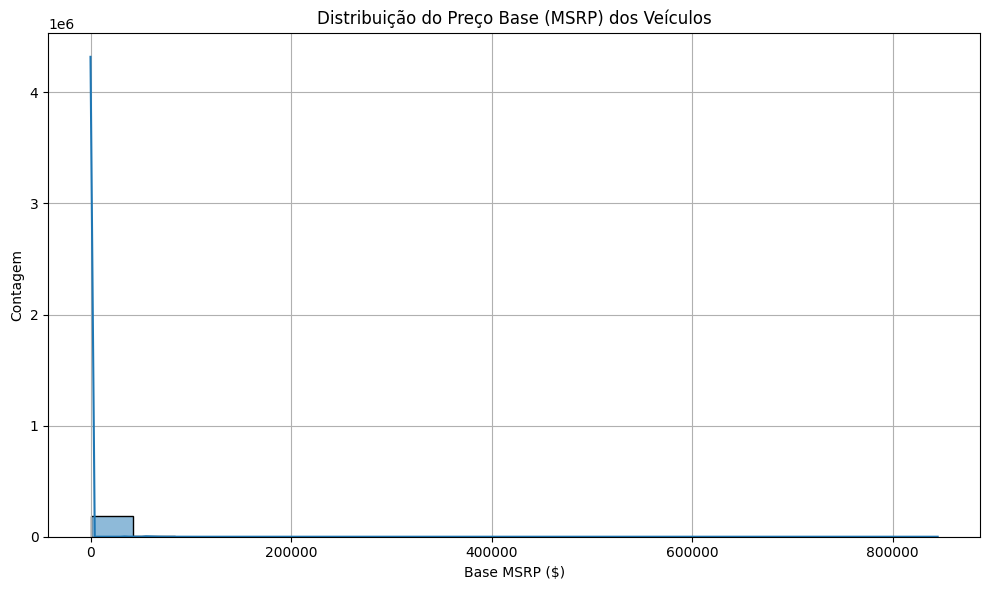

In [21]:
#Analise do preço dos veiculos

plt.figure(figsize=(10, 6))
sns.histplot(ev_data['Base MSRP'].dropna(), bins=20, kde=True)
plt.title('Distribuição do Preço Base (MSRP) dos Veículos')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Contagem')
plt.grid(True)
plt.tight_layout()
plt.show()